In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
array = [[1, 2, 3], [4, 5, 6]]
array1 = np.array(array)
print('array type {}'.format(type(array1)))
print('array shape {}'.format(np.shape(array1)))

array type <class 'numpy.ndarray'>
array shape (2, 3)


In [3]:
import torch

tensor = torch.Tensor(array)
print('array type {}'.format(tensor.type))
print('array shape {}'.format(tensor.shape))

array type <built-in method type of Tensor object at 0x7f6dea19c0f0>
array shape torch.Size([2, 3])


In [4]:
print('numpy {} \n'.format(np.ones((2, 3))))
print(torch.ones((2, 3)))

numpy [[1. 1. 1.]
 [1. 1. 1.]] 

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
print('numpy {}\n'.format(np.random.rand(2,3)))
print(torch.rand(2,3))

numpy [[0.8701808  0.5221238  0.37178392]
 [0.97349573 0.54289952 0.34846074]]

tensor([[0.8946, 0.1128, 0.2492],
        [0.9985, 0.8377, 0.7463]])


In [6]:
# random numpy array
array = np.random.rand(2, 2)
print('{} {}\n'.format(type(array), array))

<class 'numpy.ndarray'> [[5.10821997e-04 9.23483888e-01]
 [3.39504118e-01 2.53273017e-01]]



In [7]:
# numpy -> tensor
from_numpy_to_tensor = torch.from_numpy(array)
print('{}\n'.format(from_numpy_to_tensor))

tensor([[5.1082e-04, 9.2348e-01],
        [3.3950e-01, 2.5327e-01]], dtype=torch.float64)



In [8]:
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print('{} {}'.format(type(from_tensor_to_numpy), from_tensor_to_numpy))

<class 'numpy.ndarray'> [[5.10821997e-04 9.23483888e-01]
 [3.39504118e-01 2.53273017e-01]]


In [9]:
tensor = torch.ones(3, 3)
print(tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [10]:
# reshape
print('{}{}\n'.format(tensor.view(9).shape, tensor.view(9)))

torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])



In [11]:
# add
print('addition : {}\n'.format(torch.add(tensor, tensor)))

addition : tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])



In [12]:
# substraction
print('substraction: {}\n'.format(tensor.sub(tensor)))

substraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])



In [13]:
# mul
# div

In [14]:
tensor = torch.Tensor([1, 2, 3, 4, 5])
print('mean: {}'.format(tensor.mean()))

mean: 3.0


In [15]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

In [16]:
# backpropagation
array = [2, 4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad=True)
y = x ** 2

o = (1/2) * sum(y)

o.backward() # gradient 계산

x.grad

tensor([2., 4.])

In [17]:
car_prices_array = list(range(3, 10))

In [18]:
car_prices_array

[3, 4, 5, 6, 7, 8, 9]

In [19]:
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1, 1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

In [20]:
num_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
num_of_car_sell_np = np.array(num_of_car_sell_array, dtype=np.float32)
num_of_car_sell_np = num_of_car_sell_np.reshape(-1, 1)
num_of_car_sell_tensor = Variable(torch.from_numpy(num_of_car_sell_np))

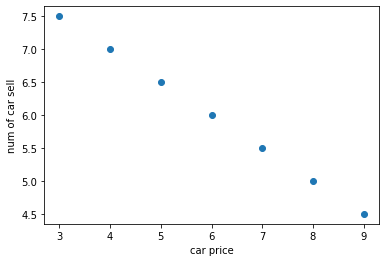

In [21]:
plt.scatter(car_prices_array, num_of_car_sell_array)
plt.xlabel('car price')
plt.ylabel('num of car sell')
plt.show()

In [22]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()

lr = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [23]:
loss_list = []
iteration_num = 1000

for iteration in range(iteration_num):
    # optimizer 초기화
    optimizer.zero_grad()
    
    # foward 연산
    results = model(car_price_tensor)
    
    # loss 연산
    loss = mse(results, num_of_car_sell_tensor)
    
    # backward
    loss.backward()
    
    # optimizer update
    optimizer.step()
    
    loss_list.append(loss.data)
    
    if iteration % 50 == 0:
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 59.82780075073242
epoch 50, loss 6.798258304595947
epoch 100, loss 6.53740930557251
epoch 150, loss 6.286570072174072
epoch 200, loss 6.045355796813965
epoch 250, loss 5.813395977020264
epoch 300, loss 5.590336799621582
epoch 350, loss 5.375836372375488
epoch 400, loss 5.169567108154297
epoch 450, loss 4.971210956573486
epoch 500, loss 4.7804670333862305
epoch 550, loss 4.59704065322876
epoch 600, loss 4.420653343200684
epoch 650, loss 4.251033782958984
epoch 700, loss 4.087921619415283
epoch 750, loss 3.9310686588287354
epoch 800, loss 3.780230760574341
epoch 850, loss 3.635183572769165
epoch 900, loss 3.4957025051116943
epoch 950, loss 3.361572742462158


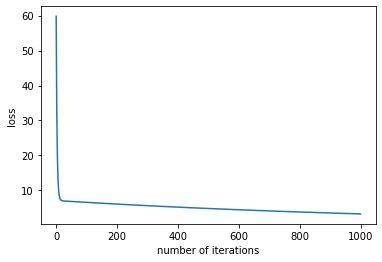

In [24]:
plt.plot(range(iteration_num), loss_list)
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.show()

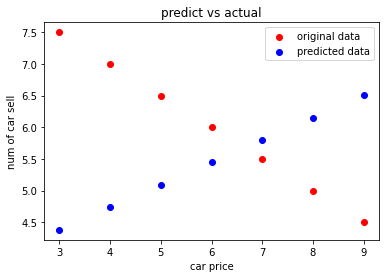

In [25]:
predict = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, num_of_car_sell_array, label='original data', color='red')
plt.scatter(car_prices_array, predict, label='predicted data', color='blue')

plt.legend()
plt.xlabel('car price')
plt.ylabel('num of car sell')
plt.title('predict vs actual')
plt.show()

In [26]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [27]:
train = pd.read_csv('../input/digit-recognizer/train.csv', dtype=np.float32)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values / 255 # 정규화

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features_numpy,
                                                   targets_numpy,
                                                   test_size=0.2,
                                                   random_state=42)

In [29]:
features_train = torch.from_numpy(x_train)
targets_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [30]:
features_test = torch.from_numpy(x_test)
targets_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [31]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [32]:
train = torch.utils.data.TensorDataset(features_train, targets_train)
test = torch.utils.data.TensorDataset(features_test, targets_test)

In [33]:
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [34]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [35]:
input_dim = 28 * 28
output_dim = 10 # 0 ~ 9 숫자

model = LogisticRegressionModel(input_dim, output_dim)

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [36]:
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(train)
        
        loss = error(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28 * 28))
                
                outputs = model(test)
                
                predict = torch.max(outputs.data, 1)[1]
                
                total += len(labels)
                
                correct += (predict == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            
        if count % 500 == 0:
            print('iteration: {} loss: {} accuracy: {}%'.format(count, loss.data, accuracy))
        

iteration: 500 loss: 2.2968192100524902 accuracy: 12.595237731933594%
iteration: 1000 loss: 2.2377545833587646 accuracy: 19.571428298950195%
iteration: 1500 loss: 2.184701442718506 accuracy: 29.940475463867188%
iteration: 2000 loss: 2.1069862842559814 accuracy: 40.33333206176758%
iteration: 2500 loss: 2.0781612396240234 accuracy: 48.404762268066406%
iteration: 3000 loss: 2.0512006282806396 accuracy: 55.02381134033203%
iteration: 3500 loss: 2.012422800064087 accuracy: 59.7023811340332%
iteration: 4000 loss: 1.9137911796569824 accuracy: 63.345237731933594%
iteration: 4500 loss: 1.9778105020523071 accuracy: 66.19047546386719%
iteration: 5000 loss: 1.8967905044555664 accuracy: 68.25%
iteration: 5500 loss: 1.8414536714553833 accuracy: 69.82142639160156%
iteration: 6000 loss: 1.8789689540863037 accuracy: 71.33333587646484%
iteration: 6500 loss: 1.775144100189209 accuracy: 72.67857360839844%
iteration: 7000 loss: 1.769058108329773 accuracy: 73.79762268066406%
iteration: 7500 loss: 1.708994865

Text(0.5, 1.0, 'loss vs num of iteration')

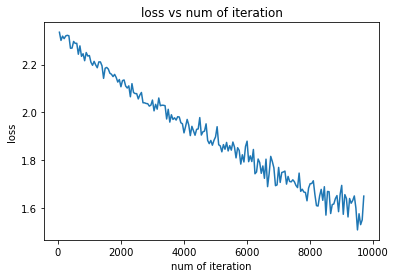

In [37]:
plt.plot(iteration_list, loss_list)
plt.xlabel('num of iteration')
plt.ylabel('loss')
plt.title('loss vs num of iteration')

In [38]:
class DNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DNNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.elu3(out)
        
        out = self.fc4(out)
        
        return out

In [39]:
input_dim = 28 * 28
hidden_dim = 150
output_dim = 10 # 0 ~ 9 숫자

model = DNNModel(input_dim, hidden_dim,output_dim)

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.002)

In [40]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 2.2881720066070557  Accuracy: 15.404762268066406 %
Iteration: 1000  Loss: 2.254699468612671  Accuracy: 39.738094329833984 %
Iteration: 1500  Loss: 2.194817304611206  Accuracy: 57.869049072265625 %
Iteration: 2000  Loss: 2.08489990234375  Accuracy: 64.10713958740234 %
Iteration: 2500  Loss: 1.9080582857131958  Accuracy: 61.75 %
Iteration: 3000  Loss: 1.588404893875122  Accuracy: 61.261905670166016 %
Iteration: 3500  Loss: 1.2115064859390259  Accuracy: 65.60713958740234 %
Iteration: 4000  Loss: 0.9429918527603149  Accuracy: 70.76190185546875 %
Iteration: 4500  Loss: 1.0443878173828125  Accuracy: 75.16666412353516 %
Iteration: 5000  Loss: 0.8133823871612549  Accuracy: 77.95237731933594 %
Iteration: 5500  Loss: 0.777028501033783  Accuracy: 80.17857360839844 %
Iteration: 6000  Loss: 0.7743731141090393  Accuracy: 82.02381134033203 %
Iteration: 6500  Loss: 0.5632597804069519  Accuracy: 83.10713958740234 %
Iteration: 7000  Loss: 0.659900963306427  Accuracy: 84.03571319580

Text(0.5, 1.0, 'loss vs num of iteration')

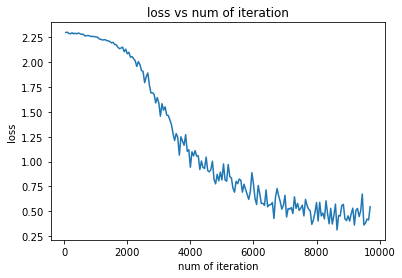

In [41]:
plt.plot(iteration_list, loss_list)
plt.xlabel('num of iteration')
plt.ylabel('loss')
plt.title('loss vs num of iteration')

In [42]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.fc = nn.Linear(32 * 4 * 4, 10)
        
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        
        out = self.maxpool1(out)
        
        out = self.cnn2(out)
        out = self.relu2(out)
        
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)
        
        out = self.fc(out)
        
        return out

In [43]:
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(features_train, targets_train)
test = torch.utils.data.TensorDataset(features_test, targets_test)

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [44]:
model = CNNModel()

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

In [46]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(100, 1, 28, 28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

ModuleAttributeError: 'CNNModel' object has no attribute 'fc1'